<a href="https://colab.research.google.com/github/silviolima07/Cluster_Customers/blob/main/Cluster_Customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Segmentação de Clientes
### Aplicando a técnica RFM - Recency, Frequency e Monetary

![alt text](https://drive.google.com/uc?id=1zvxNoVN4sKb9Tn6NNk2EXtdXODcl-n2J)

#### As métricas RFM são importantes indicadores do comportamento de um cliente. 
#### A partir dos valores de Frequency (F) e Monetary (M) identifica-se um hábito de consumo.
#### E a partir dos valores de Recency (R) o grau de envolvimento ou engajamento do cliente.

## Importância
### Por que é importante identificar o tipo de cliente?
#### -  A análise permite orientar as decisões de uma empresa visando fornecer ao cliente a melhor experiência possível
#### - Fidelizar o relacionamento com o cliente
#### - Planejar ações que satisfaçam ao público consumidor
## Descobertas
#### - Quais os clientes mais valiosos ?
#### - Qual o ticket médio deles ?
#### - Qual o intervalo entre compras ?
#### - Quais os clientes que carecem de uma atenção maior visando estimular o consumo ?

### Referencias:
- https://www.kaggle.com/mgmarques/customer-segmentation-and-market-basket-analysis/execution
- https://laptrinhx.com/rfm-customer-segmentation-using-k-means-3499769473/

In [66]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from IPython.core.pylabtools import figsize
from IPython.display import display, HTML
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 200) 
pd.set_option('display.max_rows', 400)
import seaborn as sns
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import re

import math
import os
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
def ignore_warn(*args, **kwargs):
    pass


%matplotlib inline

"""
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)
color = sns.color_palette()
sns.set_style('darkgrid')

from mpl_toolkits.mplot3d import Axes3D

%config InlineBackend.figure_format = 'svg'

import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)
color = sns.color_palette()
sns.set_style('darkgrid')
"""


'\nimport seaborn as sns\nsns.set(style="ticks", color_codes=True, font_scale=1.5)\ncolor = sns.color_palette()\nsns.set_style(\'darkgrid\')\n\nfrom mpl_toolkits.mplot3d import Axes3D\n\n%config InlineBackend.figure_format = \'svg\'\n\nimport seaborn as sns\nsns.set(style="ticks", color_codes=True, font_scale=1.5)\ncolor = sns.color_palette()\nsns.set_style(\'darkgrid\')\n'

In [67]:
#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

In [132]:
# Read dataset
ifood = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/Ifood/ml_project1_data.csv")

In [133]:
ifood.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [70]:
ifood.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [71]:
ifood.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [72]:
ifood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [134]:
 ifood.fillna(ifood.mean(), inplace=True)

In [ ]:
#ifood.isnull().sum()

# Questão: Qual a distribuição de idades ?

### A maior faixa de idade dos clientes esta entre 45 e 50

In [75]:
def hist_plot(df,var,bins=20):
  return df.hist(column = var, figsize=(7,6), bins=bins);

In [76]:
import datetime
year = datetime.datetime.today().year
def idade ():
  n = year - ifood.Year_Birth
  return n

In [77]:
ifood['Age'] = idade() 

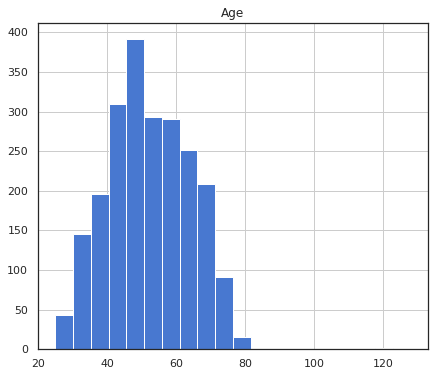

In [78]:
hist_plot(ifood, 'Age');

# Questão: Qual o nível de ensino dos clientes ?

### Graduation - 50,31%
### PhD        - 21,70%
### Master     - 16,52%
### 2n Cycle   - 9,06%
### Basic      - 2,41%

In [135]:
ifood.Education.value_counts(normalize=True)

Graduation    0.503125
PhD           0.216964
Master        0.165179
2n Cycle      0.090625
Basic         0.024107
Name: Education, dtype: float64

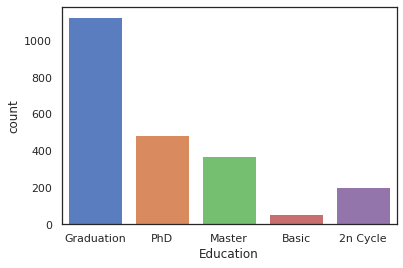

In [80]:
ax = sns.countplot(x="Education", data=ifood)

# Questão: Qual a distribuição dos estados civis ?

### As três maiores são:
### Married  - 846 ou 38,57%
### Together - 580 ou 25,90%
### Single   - 480 ou 21,43%

In [136]:
ifood.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [139]:
ifood['Marital_Status'].value_counts(normalize = True)

Married     0.385714
Together    0.258929
Single      0.214286
Divorced    0.103571
Widow       0.034375
Alone       0.001339
YOLO        0.000893
Absurd      0.000893
Name: Marital_Status, dtype: float64

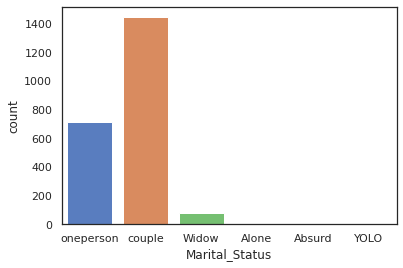

In [144]:
ax = sns.countplot(x="Marital_Status", data=ifood)

In [141]:
ifood['Marital_Status'].replace(to_replace=dict(Single='oneperson', Divorced='oneperson'), inplace=True)

In [143]:
ifood['Marital_Status'].replace(to_replace=dict(Married='couple', Together='couple'), inplace=True)

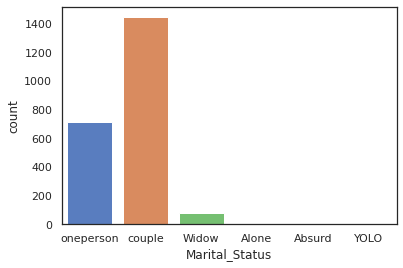

In [145]:
ax = sns.countplot(x="Marital_Status", data=ifood)

# Questão: Qual a distribuição do income ?


### Maioria esta entre 50k e 100k

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87eb195588>]],
      dtype=object)

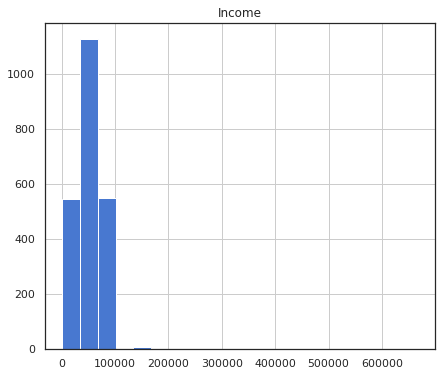

In [87]:
hist_plot(ifood,'Income',20)

### Uma técnica aplicada na segmentação de clientes é conhecida como RFM.
### Recency (R) - número de dias desde a última compra.
### Frequency (F) - número de compras efetuadas num periodo.
### Monetary (M)  - Volume total de vendas

### Recency
### O histograma mostra uma distribuição onde existe um consumo em periodos com 10 dias de intervalo.


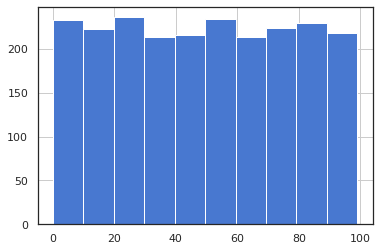

In [88]:
ifood.Recency.hist()

### Entre 20 e 30 dias existem 236 ocorrências, que seriam 236 clientes que efetuaram a última nesse intervalo de tempo.

In [89]:
ifood.Recency.value_counts(bins=10)

(19.8, 29.7]    236
(49.5, 59.4]    234
(-0.1, 9.9]     233
(79.2, 89.1]    229
(69.3, 79.2]    224
(9.9, 19.8]     223
(89.1, 99.0]    218
(39.6, 49.5]    216
(29.7, 39.6]    214
(59.4, 69.3]    213
Name: Recency, dtype: int64

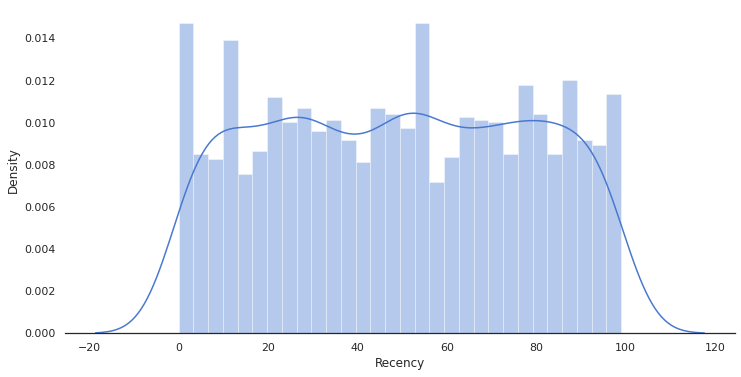

In [90]:
# plotting the distribution of the continous feature set
sns.set(palette='muted', color_codes=True, style='white')
fig, ax = plt.subplots(figsize=(12, 6))
sns.despine(left=True)
sns.distplot(ifood['Recency'], bins=30)
plt.show()

### Clusters identificados no conjunto de dados Recency

In [91]:
from sklearn.cluster import KMeans 

def number_of_cluster(coluna):
  sse={}
  df_cluster = ifood[[coluna]]
  for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_cluster)
    df_cluster["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
    
  plt.figure(figsize=(10, 5))
  plt.plot(list(sse.keys()), list(sse.values()))
  plt.title("Number of Cluster by Column\n"+coluna)
  plt.xlabel("Number of cluster")
  plt.show()

In [92]:
def create_cluster(ifood,coluna, nova_coluna):
  #building 3 clusters for Frequency and adding it to dataframe
  kmeans = KMeans(n_clusters=3)
  kmeans.fit(ifood[[coluna]])
  ifood[nova_coluna] = kmeans.predict(ifood[[coluna]])
  ifood = order_cluster(nova_coluna, coluna,ifood,False)

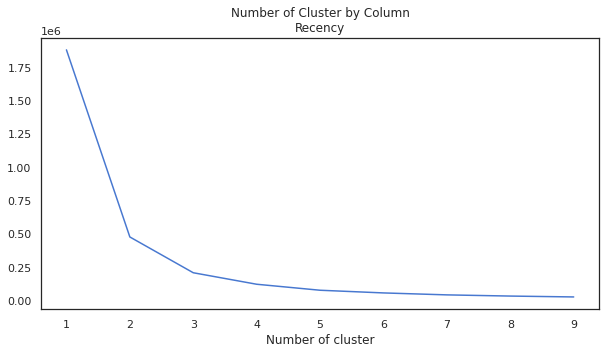

In [93]:
number_of_cluster('Recency')

### Criando o cluster a partir da coluna Recency

In [94]:
create_cluster(ifood,'Recency', 'RecencyCluster')

### Três clusters foram identificados.

In [95]:
ifood.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,747.0,49.884873,9.570684,33.0,42.0,50.0,57.0,66.0
1,763.0,15.986894,9.783072,0.0,8.0,16.0,25.0,32.0
2,730.0,82.935616,9.373515,67.0,75.0,83.0,91.0,99.0


### Frequency

### Quantidade de itens comprados pelo clientes efetuou no periodo.


In [96]:
ifood.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,RecencyCluster
0,5524,1957,Graduation,oneperson,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,64,0
1,2174,1954,Graduation,oneperson,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,67,0
2,4141,1965,Graduation,couple,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,56,1
3,6182,1984,Graduation,couple,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,37,1
4,5324,1981,PhD,couple,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,40,2


### Filtrar as colunas que iniciam com os caracteres ID e as colunas que terminam em Purchases

In [97]:
frequency = ifood.loc[:,(ifood.columns.str.startswith("ID")) | (ifood.columns.str.endswith("Purchases"))]

In [98]:
frequency.head()

,ID,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,5524,3,8,10,4
1,2174,2,1,1,2
2,4141,1,8,2,10
3,6182,2,2,0,4
4,5324,5,5,3,6


### A coluna Frequency será o valor total de compras efetuadas pelo cliente.

In [99]:
ifood['Frequency'] = frequency.loc[:,(frequency.columns.str.endswith("Purchases"))].sum(axis=1)

In [100]:
ifood.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,RecencyCluster,Frequency
0,5524,1957,Graduation,oneperson,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,64,0,25
1,2174,1954,Graduation,oneperson,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,67,0,6
2,4141,1965,Graduation,couple,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,56,1,21
3,6182,1984,Graduation,couple,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,37,1,8
4,5324,1981,PhD,couple,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,40,2,19


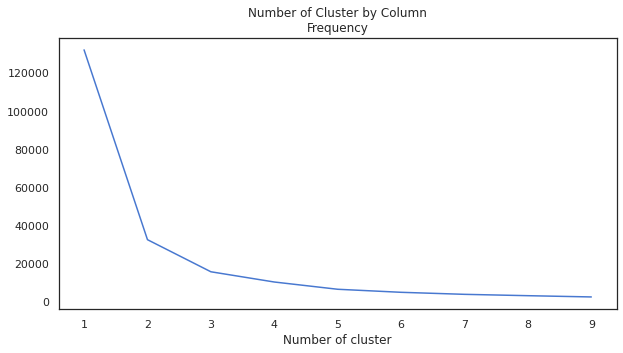

In [101]:
number_of_cluster('Frequency')

In [102]:
create_cluster(ifood, 'Frequency', 'FrequencyCluster')

In [103]:
ifood.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,734.0,16.486376,2.472596,12.0,15.0,17.0,19.0,20.0
1,607.0,24.637562,3.274127,21.0,22.0,24.0,26.0,44.0
2,899.0,6.935484,2.253495,0.0,5.0,7.0,9.0,11.0


### Monetary

### Filtrar as colunas que iniciam com os caracteres ID e Mnt, seguidos de zero ou mais caracteres

In [104]:
monetary = ifood.loc[:,(ifood.columns.str.startswith("ID")) | (ifood.columns.str.startswith("Mnt"))]

### Soma de todas compras (Dolar) efetuadas nos ultimos 2 anos

In [105]:
ifood['Monetary'] = monetary.loc[:,(monetary.columns.str.startswith("Mnt"))].sum(axis=1)

In [106]:
ifood.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,RecencyCluster,Frequency,FrequencyCluster,Monetary
0,5524,1957,Graduation,oneperson,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,64,0,25,1,1617
1,2174,1954,Graduation,oneperson,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,67,0,6,2,27
2,4141,1965,Graduation,couple,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,56,1,21,1,776
3,6182,1984,Graduation,couple,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,37,1,8,2,53
4,5324,1981,PhD,couple,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,40,2,19,0,422


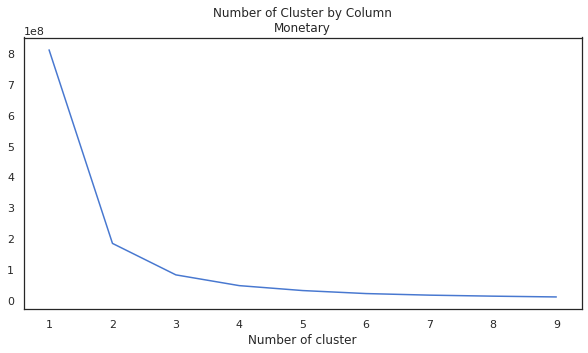

In [107]:
number_of_cluster("Monetary")

In [108]:
create_cluster(ifood, 'Monetary', 'MonetaryCluster')

In [109]:
# Details of each cluster
ifood.groupby('MonetaryCluster')['Monetary'].describe()

,count,mean,std,min,25%,50%,75%,max
MonetaryCluster,,,,,,,,
0,1271.0,152.561762,146.149376,5.0,44.0,81.0,241.0,535.0
1,607.0,920.140033,211.820161,541.0,734.5,929.0,1101.0,1295.0
2,362.0,1670.046961,271.940652,1298.0,1453.5,1616.5,1832.0,2525.0


### Traçando uma linha de regressão com os dados.
### E analisando se há correlação.
- Recency   x Monetary
- Frequency x Monetary

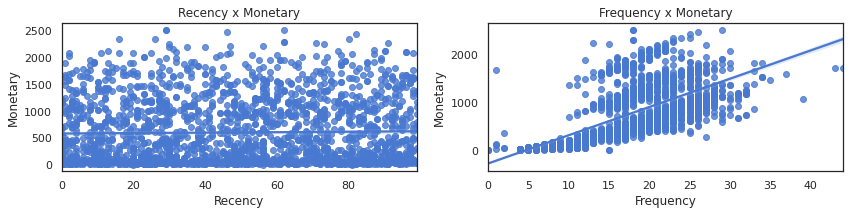

In [110]:
fig = plt.figure(figsize=(14,6))
f1 = fig.add_subplot(221); sns.regplot(x='Recency', y='Monetary', data=ifood)
plt.title("Recency x Monetary")
f1 = fig.add_subplot(222); sns.regplot(x='Frequency', y='Monetary', data=ifood)
plt.title("Frequency x Monetary")

plt.show()

### Correlação entre Recency e Monetary

In [111]:
ifood[['Recency', 'Monetary']].corr()

,Recency,Monetary
Recency,1.000000,0.020433
Monetary,0.020433,1.000000


### Correlação entre Frequency e Monetary

In [112]:
ifood[['Frequency', 'Monetary']].corr()

,Frequency,Monetary
Frequency,1.000000,0.753903
Monetary,0.753903,1.000000


### Recency x Monetary
#### A correlação entre a variável Recency, que identifica o número de dias desde a última compra e o valor Monetary, que representa o total de compras (Dolar) nos últimos 2 anos é nula. A visualização dos dados confirma essa informação.
### Frequency x Monetary
#### Apresenta uma correlação positiva, quanto maior o valor de Frequency( total de itens comprados no periodo) maior o total de compras no periodo.

### Plotando um gráfico 3D

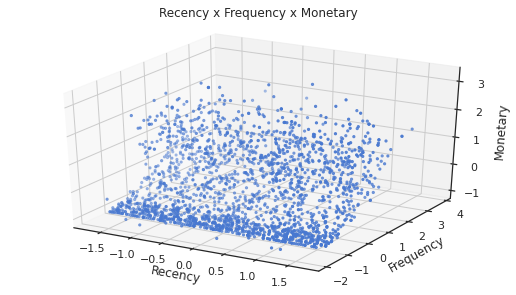

In [113]:
X = ifood[['Recency','Frequency','Monetary']].copy()
scaler = StandardScaler()
X = scaler.fit_transform(X)

fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot(111, projection='3d')

xs = X[:,0] # Recency
ys = X[:,1] # Frequency
zs = X[:,2] # Monetary

ax.scatter(xs, ys, zs, s=5)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title("Recency x Frequency x Monetary\n")
plt.show()

### Criando um cluster a partir da coluna Age

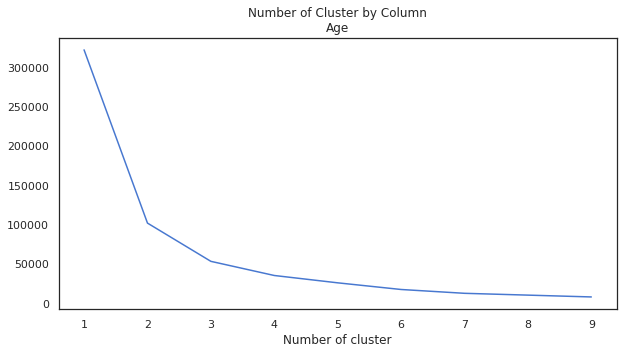

In [114]:
number_of_cluster("Age")

In [115]:
create_cluster(ifood, 'Age', 'AgeCluster')

In [116]:
ifood.groupby('AgeCluster')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
AgeCluster,,,,,,,,
0,554.0,37.357401,4.397360,25.0,34.0,38.0,41.0,43.0
1,699.0,66.517883,6.054969,59.0,62.0,66.0,70.0,128.0
2,987.0,50.377913,4.110053,44.0,47.0,50.0,54.0,58.0


### Criando um cluster a partir da coluna NumWebVisitsMonth
### Número de Visitas ao Site por Mês

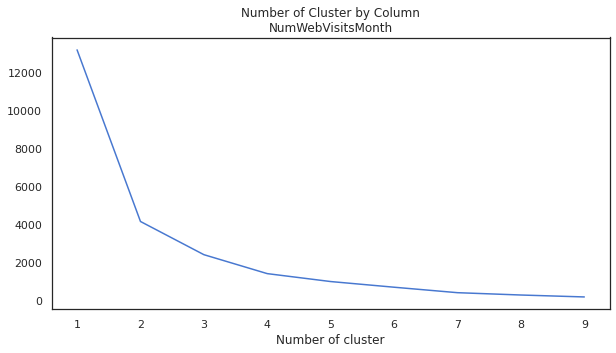

In [117]:
number_of_cluster("NumWebVisitsMonth")

In [118]:
create_cluster(ifood, 'NumWebVisitsMonth', 'NumWebVisitsMonthCluster')

In [119]:
ifood.groupby('NumWebVisitsMonthCluster')['NumWebVisitsMonth'].describe()

,count,mean,std,min,25%,50%,75%,max
NumWebVisitsMonthCluster,,,,,,,,
0,830.0,7.734940,1.243408,7.0,7.0,8.0,8.0,20.0
1,789.0,2.590621,1.125822,0.0,2.0,3.0,4.0,4.0
2,621.0,5.547504,0.498139,5.0,5.0,6.0,6.0,6.0


### Análise de Correlação.
- Age x Monetary
-  NumWebVisitsMonth x Monetary

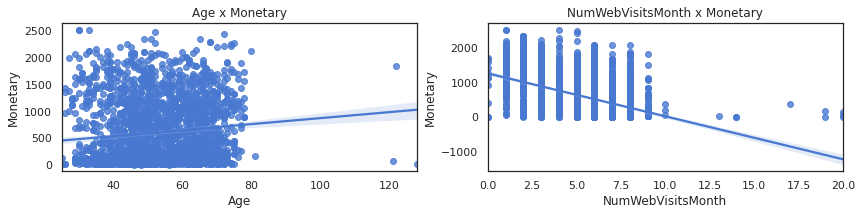

In [120]:
fig = plt.figure(figsize=(14,6))
f1 = fig.add_subplot(221); sns.regplot(x='Age', y='Monetary', data=ifood)
plt.title("Age x Monetary")
f1 = fig.add_subplot(222); sns.regplot(x='NumWebVisitsMonth', y='Monetary', data=ifood)
plt.title("NumWebVisitsMonth x Monetary")
plt.show()

### Correlação entre Age e Monetary

In [121]:
ifood[['Age', 'Monetary']].corr()

,Age,Monetary
Age,1.000000,0.111306
Monetary,0.111306,1.000000


### Correlação entre NumWebVisitsMonth e Monetary

In [122]:
ifood[['NumWebVisitsMonth', 'Monetary']].corr()

,NumWebVisitsMonth,Monetary
NumWebVisitsMonth,1.000000,-0.500218
Monetary,-0.500218,1.000000


### Age x Monetary
#### A correlação entre a variável Age, que identifica a idade do cliente e o valor Monetary é positiva. A visualização dos dados confirma essa informação.
### NumWebVisitsMonth x Monetary
#### Apresenta uma correlação negativa, quanto maior o número de visitas ao site mensalmente, menor o total de compras no periodo.

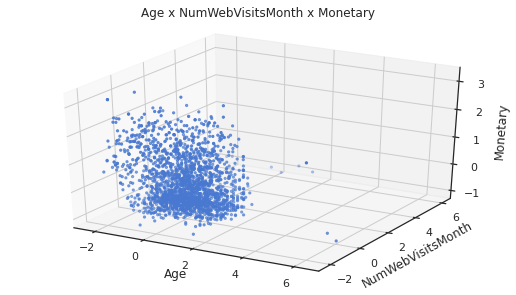

In [123]:
X = ifood[['Age','NumWebVisitsMonth','Monetary']].copy()
scaler = StandardScaler()
X = scaler.fit_transform(X)

fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot(111, projection='3d')

xs = X[:,0] # Age
ys = X[:,1] # NumWebVisitsMonth
zs = X[:,2] # Monetary

ax.scatter(xs, ys, zs, s=5)

ax.set_xlabel('Age')
ax.set_ylabel('NumWebVisitsMonth')
ax.set_zlabel('Monetary')
plt.title("Age x NumWebVisitsMonth x Monetary\n")
plt.show()

### Análise da Distribuição dos Clusters

In [124]:
def create_boxplot(clusters):
  #fig = plt.figure(figsize=(10, 5))
  for i,el in enumerate(clusters):
    fig = sns.boxplot(x=clusters[i], y='Monetary', data=ifood)
    plt.title("\n"+clusters[i]+" x Monetary")
    plt.show();

In [125]:
ifood_clusters = ['RecencyCluster','FrequencyCluster',
       'MonetaryCluster']

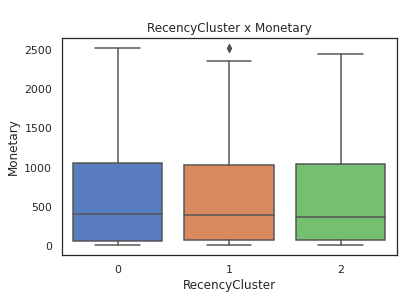

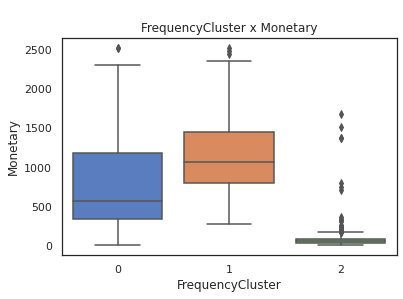

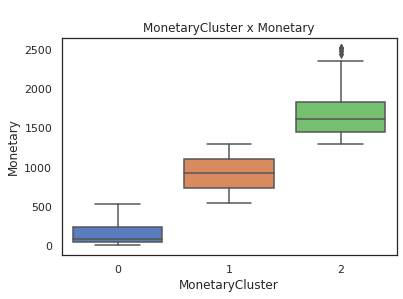

In [126]:
create_boxplot(ifood_clusters)

## Caracteristicas identificadas a partir do boxplot do Clusters
## Variáveis: **Recency (R)**, **Frequency  (F)** e **Monetary (M)**
## Considerando um periodo de 2 anos
### - **Cluster 0**
####  O intervalo de compra é semelhante em todos clusters
####  Apresenta baixos números de compras, possui alguns valores considerados fora do normal (outliers)
#### Baixo valor acumulado de compras no periodo
#  
### - **Cluster 1**
#### Intervalo de compra é semelhante em todos clusters
#### Número médio de compras acima de 1000 no periodo
#### Valor médio de compras por volta de 1000 (Dolares)
#  
### - **Cluster 2**
####  Intervalo de compra é semelhante em todos clusters
#### Número de compras entre 500 e 1000.
#### Valor médio de compras por volta de 1500 (Dolares)





# **Ranking dos Clientes**

![alt text](https://drive.google.com/uc?id=1KkJS_A5xUE17-oUQ6UfQ29d22ZJFRB4c)

## Conclusões possíveis:
### Os clientes podem ser divididos em 3 grupos:
## ***Categoria OURO***
#### Cluster 2 --> Clentes que efetuaram compras entre 500 e 1000 itens e gastaram na média 1500 dolares no periodo
## ***Categoria PRATA***
#### Cluster 1 --> Clientes que efetuaram na média acima de 1000 compras (itens) e gastaram por volta de 1000 dolares no periodo
## ***Categoria BRONZE***
#### Cluster 0 --> Clientes que compraram e gastaram pouco no periodo.

### ESTUDOS: 
#### Outras análises podem ser feitas utilizando outras variáveis como por exemplo a coluna Age e  NumWebVisitsMonth.
#### Foram identificados os cluster usando essas colunas.

In [127]:
ifood_clusters = ['AgeCluster', 'NumWebVisitsMonthCluster']

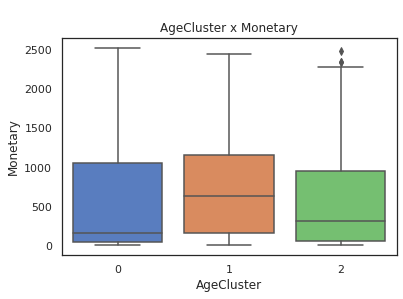

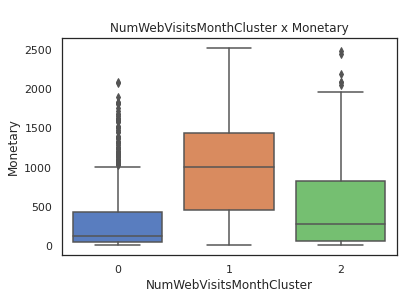

In [128]:
create_boxplot(ifood_clusters)